# üéì Global Tech University Admissions Optimizer

This notebook builds a decision-support tool to help GTU predict admissions probability and scholarship eligibility based on historical data.

In [14]:
# üì¶ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [15]:
# üì• Load Data
# Replace with your actual file path or upload via Colab
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Admission_Predict.csv to Admission_Predict (2).csv


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [16]:
# üßπ Data Preprocessing
df = df.dropna()
df = df.rename(columns=lambda x: x.strip().replace(" ", "_"))

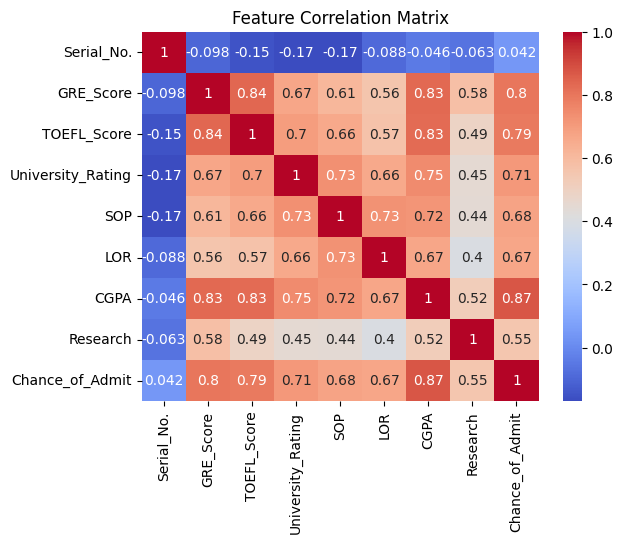

In [17]:
# üìä Exploratory Data Analysis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
# üìà Multicollinearity Check
X_vif = sm.add_constant(df.drop(columns=['Chance_of_Admit']))
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

feature          VIF
0              const  1533.435012
1         Serial_No.     1.087496
2          GRE_Score     4.617117
3        TOEFL_Score     4.357634
4  University_Rating     2.959083
5                SOP     3.113171
6                LOR     2.432982
7               CGPA     5.419519
8           Research     1.543329

In [19]:
# üß† Linear Regression
X = df.drop(columns=["Chance_of_Admit"])
y = df["Chance_of_Admit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("R¬≤ (Linear Regression):", r2_score(y_test, y_pred_lr))

R¬≤ (Linear Regression): 0.8212241793299226


In [20]:
# üå≥ Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
params_dt = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]}
grid_dt = GridSearchCV(dt, params_dt, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)
print("R¬≤ (Tuned Decision Tree):", r2_score(y_test, y_pred_dt))

R¬≤ (Tuned Decision Tree): 0.8057112848116956


In [21]:
# üå≤ Random Forest Regressor with Tuning
rf = RandomForestRegressor(random_state=42)
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = RandomizedSearchCV(rf, params_rf, n_iter=10, cv=3, random_state=42)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
print("R¬≤ (Tuned Random Forest):", r2_score(y_test, y_pred_rf))

R¬≤ (Tuned Random Forest): 0.8560077883951225


In [22]:
# ‚≠ê Feature Importance and Top 5 Feature Modeling
importances = grid_rf.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": importances})
top5 = feature_importance_df.sort_values(by="importance", ascending=False).head(5)["feature"].tolist()
print("Top 5 features:", top5)

# Retrain with Top 5 features
X_top5 = df[top5]
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)
rf_top5 = RandomForestRegressor(random_state=42)
rf_top5.fit(X_train_top5, y_train)
y_pred_top5 = rf_top5.predict(X_test_top5)
print("R¬≤ (Random Forest with Top 5):", r2_score(y_test, y_pred_top5))

Top 5 features: ['CGPA', 'GRE_Score', 'Serial_No.', 'TOEFL_Score', 'SOP']
R¬≤ (Random Forest with Top 5): 0.8512470165396518
